In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8995312390270627350
 xla_global_id: -1]

In [4]:
dataset_path = '/home/se/meka/example_data'
trainFiles = os.listdir(dataset_path)

['B_5.csv', 'A_1.csv', 'tuple_data', 'B_6.csv', 'F_1.csv', 'F_5.csv', 'picture', '.ipynb_checkpoints', 'F_2.csv', 'B_2.csv', 'C_2.csv', 'A_6.csv', 'example_data.zip', 'C_6.csv', 'split_data', 'F_4.csv', 'C_5.csv', 'A_5.csv', 'A_7.csv', 'C_3.csv', 'B_8.csv']
['1', '0', '1', '3', '3', '3', '1', '2', '0', '2', '3', '2', '0', '0', '2', '1']
21
16


<AxesSubplot:>

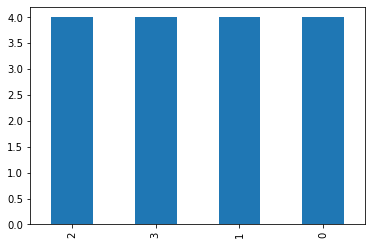

In [5]:
categories=[]  # 0:정상, 1:B / 2:C / 3:F
train_files = []
for trainFile in trainFiles:
    if '.csv' in trainFile:
        categorie=trainFile.split("_")[0]
        train_files.append(trainFile)
        if categorie == "A":
            categories.append("0")
        elif categorie == "B":
            categories.append("1")
        elif categorie == "C":
            categories.append("2")
        elif categorie == "F":
            categories.append("3")
        
df=pd.DataFrame(
{"filename":train_files, "category":categories})

print(trainFiles)
print(categories)
print(len(trainFiles))
print(len(categories))
df['category'].value_counts().plot.bar()

In [6]:
def foo(fn):
    @functools.wraps(fn)
    def wrapped(*args):
        wrapped.ncalls += 1
        return fn(*args)
    
    wrapped.ncalls = 0
    return wrapped

In [7]:
@foo
def foo_deco(c):
    print('foo_deco')

In [8]:
def calc_R(xc, yc):
    """ calculate the distance of each data points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

 # : for output feedback
def countcalls(fn):
    "decorator function count function calls"

    @functools.wraps(fn)
    def wrapped(*args):
        wrapped.ncalls +=1
        return fn(*args)

    wrapped.ncalls = 0
    return wrapped

@countcalls
def f_2(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
from PIL import Image
import functools
from scipy import optimize

def read_file(pandas):
    
    def calc_R(xc, yc):
        """ calculate the distance of each data points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

     # : for output feedback
    def countcalls(fn):
        "decorator function count function calls"

        @functools.wraps(fn)
        def wrapped(*args):
            wrapped.ncalls +=1
            return fn(*args)

        wrapped.ncalls = 0
        return wrapped

    @countcalls
    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    
    #첫번째 열 , 마지막 3열 제거
    pandas = pandas.drop(pandas.columns[0], axis = 1)
    for i in range(0, 3):
        pandas = pandas.drop(pandas.columns[-1], axis = 1)

    #각 스캔 파일의 사이즈 확인
    # (7002, 649)
    e, f = pandas.shape

    #각 스캔 파일 결측치 보충을 위한 선형보간법 사용  
    for i in range(0,e):
        for j in range(1,f):
            if pandas.at[i,j]  < 2  :
                pandas.at[i,j] = 0
            elif pandas.at[i,j]  > 7:
                pandas.at[i,j] = 0
                
    # 0을 np.NaN으로 교체후 선형 보간
    pandas = pandas.replace(0, np.NaN)
    pandas = pandas.interpolate(method='linear', axis = 1)            

    # 4,260개 행 데이터 추출(284*5*3)
#     pandas = pandas.loc[e-4662:e-402,:] #2340	 6600 기준이 뭔지 모르겠음

    pac=[]

    for i in range(3,len(pandas)+1,3):
        # 1번째 행 인덱스만 추출
        if i%3==0:
            pac.append(i-1)
        #추출한 인덱스 가지는 df 생성
    pandas = pandas.iloc[pac,:]
    
    # 결측치 교체 후 선형보간
    pandas = pandas.replace(0, np.NaN)
    pandas = pandas.interpolate(method='linear', axis = 1)


    #데이터 이미지화
    pandas_orig = []

    for i in range(0,len(pandas)):
        method_2  = "Fitting Circle"

        # Coordinates of the 2D points
        x = np.linspace(-10.2,10.5,645) #(-10.2 ~ 10.5 까지 645개의 데이터를 일정 간격으로 채움)
        y = pandas.iloc[i,:]            # 행 데이터를 가져옴
        basename = 'arc'

        x_m = np.mean(x)
        y_m = np.mean(y)

         # 최소 제곱법 : 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다.
         # 근사적으로 구하려는 해중 오차가 제일 작은 해를 구함 == center_2
        center_estimate = x_m, y_m
        center_2, _ = optimize.leastsq(f_2, center_estimate)

        xc_2, yc_2 = center_2 #구한 해의 원점

        R=np.sqrt((xc_2-x)**2+(yc_2-y)**2) # 구한 해와 오차를 계산
        pandas_orig.append(R-np.min(R))    # 오차중 최소 값과 차이를 추가
        
    pandas_orig = np.array(pandas_orig)    # 배열로 리턴
    
    return pandas_orig

In [38]:
df = pd.read_csv(os.path.join(dataset_path,trainFiles[0]), header=None, index_col=None, names=None)

In [39]:
df.shape

(7002, 649)

In [40]:
#첫번째 열 , 마지막 3열 제거
df = df.drop(df.columns[0], axis = 1)
for i in range(0, 3):
    df = df.drop(df.columns[-1], axis = 1)

#각 스캔 파일의 사이즈 확인
# (7002, 649)
e, f = df.shape

#각 스캔 파일 결측치 보충을 위한 선형보간법 사용  
for i in range(0,e):
    for j in range(1,f):
        if df.at[i,j]  < 2  :
            df.at[i,j] = 0
        elif df.at[i,j]  > 7:
            df.at[i,j] = 0

In [41]:
df

,1,2,3,4,5,6,7,8,9,10,...,636,637,638,639,640,641,642,643,644,645
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.321899
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.424926
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.321899
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,821.126342
6998,3.170776,3.166198,3.163146,3.16925,3.146362,3.146362,3.149414,3.153991,3.144836,3.141784,...,3.134155,3.144836,3.155517,3.161621,3.167724,3.176879,3.178405,3.169250,3.172302,3.175354
6999,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.061401
7000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,821.478454


In [42]:
pac=[]

for i in range(3,len(df)+1,3):
    # 1번째 행 인덱스만 추출
    pac.append(i-1)
    #추출한 인덱스 가지는 df 생성
df = df.iloc[pac,:]

# 결측치 교체 후 선형보간
df = df.replace(0, np.NaN)
df = df.interpolate(method='linear', axis = 1)

In [43]:
df

,1,2,3,4,5,6,7,8,9,10,...,636,637,638,639,640,641,642,643,644,645
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.387389,7.391560,7.395731,7.399902,7.404072,7.408243,7.412414,7.416585,7.420755,7.424926
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385994,7.390150,7.394307,7.398463,7.402619,7.406775,7.410931,7.415088,7.419244,7.423400
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385994,7.390150,7.394307,7.398463,7.402619,7.406775,7.410931,7.415088,7.419244,7.423400
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385863,7.390034,7.394205,7.398376,7.402546,7.406717,7.410888,7.415059,7.419229,7.423400
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385994,7.390150,7.394307,7.398463,7.402619,7.406775,7.410931,7.415088,7.419244,7.423400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,3.170776,3.167724,3.167724,3.170776,3.146362,3.144836,3.147888,3.153991,3.144836,3.140258,...,3.134155,3.144836,3.155517,3.160095,3.167724,3.176879,3.178405,3.169250,3.172302,3.176879
6992,3.170776,3.167724,3.166198,3.166198,3.147888,3.146362,3.149414,3.155517,3.141784,3.138732,...,3.134155,3.146362,3.155517,3.160095,3.167724,3.176879,3.178405,3.169250,3.172302,3.175354
6995,3.170776,3.167724,3.166198,3.167724,3.147888,3.146362,3.147888,3.155517,3.141784,3.140258,...,3.132629,3.144836,3.155517,3.160095,3.167724,3.178405,3.179931,3.170776,3.172302,3.176879
6998,3.170776,3.166198,3.163146,3.169250,3.146362,3.146362,3.149414,3.153991,3.144836,3.141784,...,3.134155,3.144836,3.155517,3.161621,3.167724,3.176879,3.178405,3.169250,3.172302,3.175354


In [44]:
#데이터 이미지화
pandas_orig = []

for i in range(0,len(df)):
    method_2  = "Fitting Circle"

    # Coordinates of the 2D points
    x = np.linspace(-10.2,10.5,645) #(-10.2 ~ 10.5 까지 645개의 데이터를 일정 간격으로 채움)
    y = df.iloc[i,:]            # 행 데이터를 가져옴
    basename = 'arc'

    x_m = np.mean(x)
    y_m = np.mean(y)

     # 최소 제곱법 : 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다.
     # 근사적으로 구하려는 해중 오차가 제일 작은 해를 구함 == center_2
    center_estimate = x_m, y_m
    center_2, _ = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2 #구한 해의 원점

    R=np.sqrt((xc_2-x)**2+(yc_2-y)**2) # 구한 해와 오차를 계산
    pandas_orig.append(R-np.min(R))    # 오차중 최소 값과 차이를 추가

pandas_orig = np.array(pandas_orig)    # 배열로 리턴

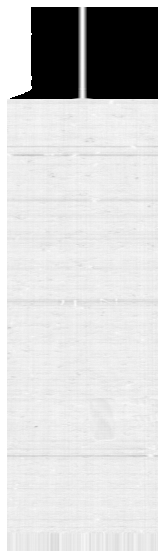

In [46]:
plt.figure(figsize = (5,10), frameon=False)
plt.imshow(pandas_orig, vmin = 0, vmax = 0.5, cmap='gist_yarg')
#plt.colorbar(shrink=0.7) # colorbar의 길이를 조정
plt.axis('off')
plt.show()

0
1
3
4
5
8
9
10
11
13
15
16
17
18
19
20


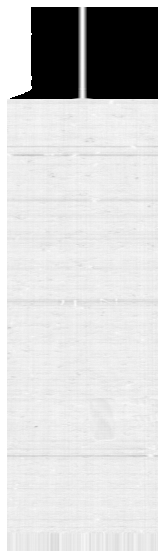

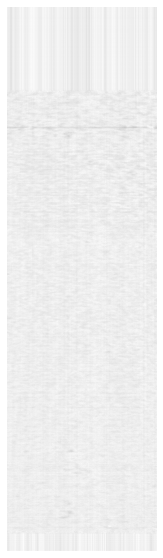

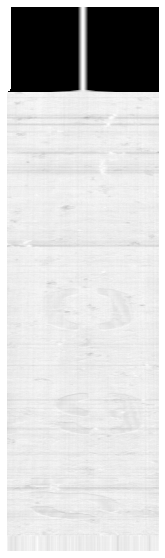

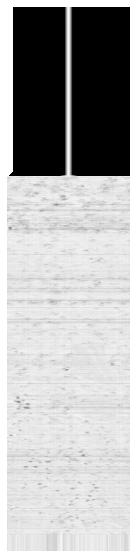

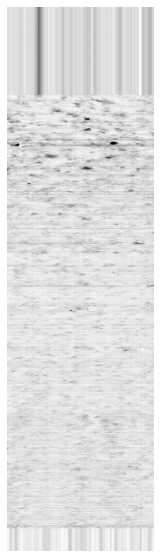

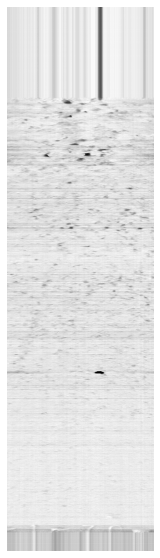

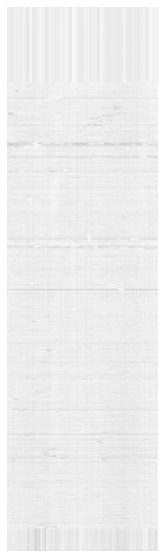

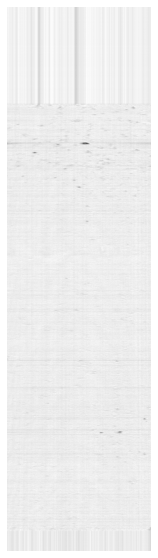

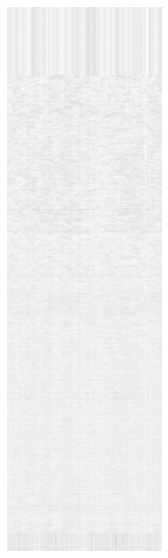

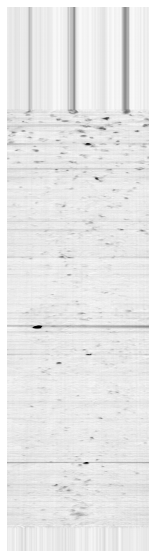

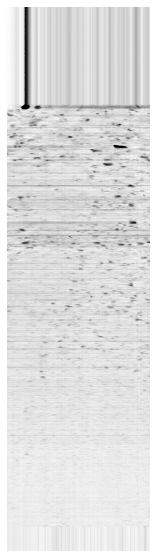

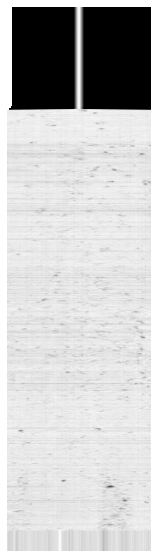

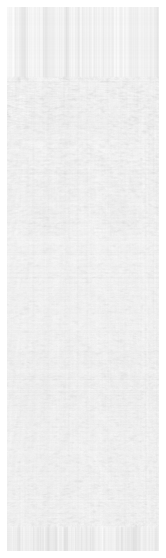

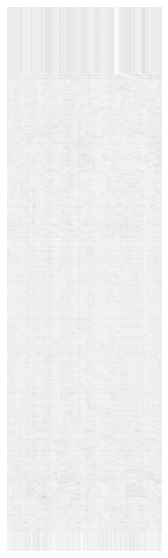

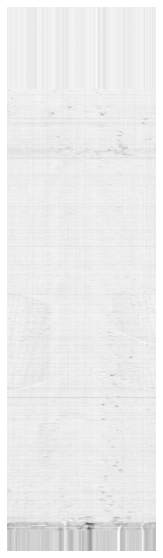

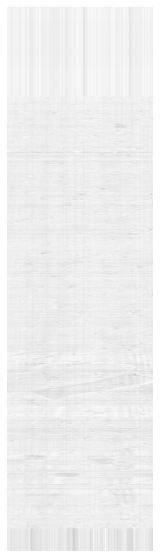

In [47]:
import os
for idx,train_file in enumerate(trainFiles):
    if '.csv' in train_file:
        df = pd.read_csv(os.path.join(dataset_path,train_file), header=None, index_col=None, names=None)
        pandas_orig = read_file(df)
        plt.figure(figsize = (5,10), frameon=False)
        plt.imshow(pandas_orig, vmin = 0, vmax = 0.5, cmap='gist_yarg')
        #plt.colorbar(shrink=0.7) # colorbar의 길이를 조정
        plt.axis('off')
        plt.savefig(os.path.join(dataset_path,'picture/'+train_file+'.png'))
        print(idx)